In [1]:
import random
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy
from scipy import stats
import seaborn as sns
%matplotlib inline


In [2]:
data = pd.read_csv("trip.csv")
print(len(data))
data.head()

286858


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286858 entries, 0 to 286857
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_id            286858 non-null  int64  
 1   starttime          286858 non-null  object 
 2   stoptime           286858 non-null  object 
 3   bikeid             286858 non-null  object 
 4   tripduration       286858 non-null  float64
 5   from_station_name  286858 non-null  object 
 6   to_station_name    286858 non-null  object 
 7   from_station_id    286858 non-null  object 
 8   to_station_id      286858 non-null  object 
 9   usertype           286858 non-null  object 
 10  gender             181557 non-null  object 
 11  birthyear          181553 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 26.3+ MB


In [4]:
data = data.sort_values(by='starttime')
data.reset_index()
print('Data range of dataset: %s - %s'%(data.loc[1, 'starttime'], data.loc[len(data)-1, 'stoptime']))


Data range of dataset: 10/13/2014 10:32 - 9/1/2016 0:20


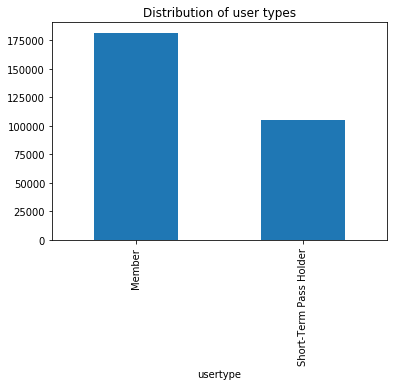

In [5]:
groupby_user = data.groupby('usertype').size()
groupby_user.plot.bar(title='Distribution of user types')

In [6]:
groupby_user

usertype
Member                    181557
Short-Term Pass Holder    105301
dtype: int64

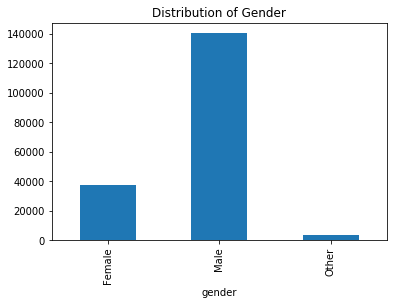

In [7]:
groupby_gender = data.groupby('gender').size()
groupby_gender.plot.bar(title = 'Distribution of Gender')

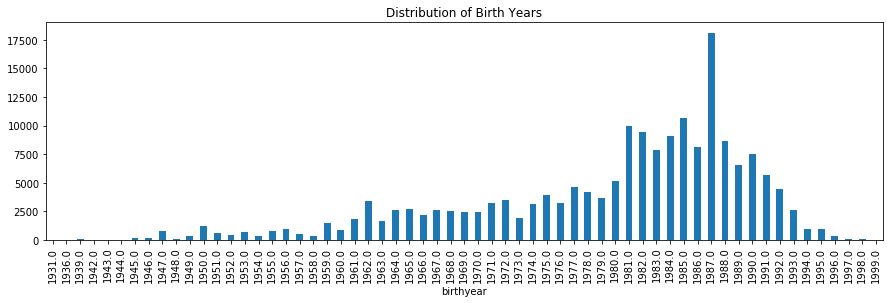

In [8]:
data = data.sort_values(by='birthyear')
groupby_birthyear = data.groupby('birthyear').size()
groupby_birthyear.plot.bar(title='Distribution of Birth Years', figsize=(15,4))

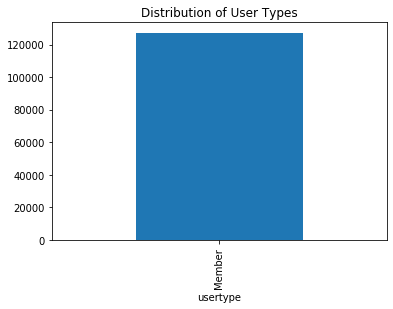

In [9]:
data_mil = data[(data['birthyear']>=1977) & (data['birthyear'] <=1994)]
groupby_mil = data_mil.groupby('usertype').size()
groupby_mil.plot.bar(title= 'Distribution of User Types')

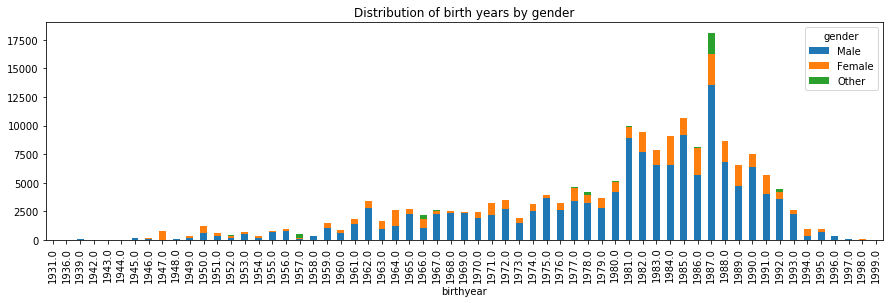

In [10]:
groupby_birthyear_gender = data.groupby(['birthyear','gender'])['birthyear'].count().unstack('gender').fillna(0)

groupby_birthyear_gender[['Male','Female', 'Other']].plot.bar(title = 'Distribution of birth years by gender', stacked=True, 
                                                             figsize = (15,4))

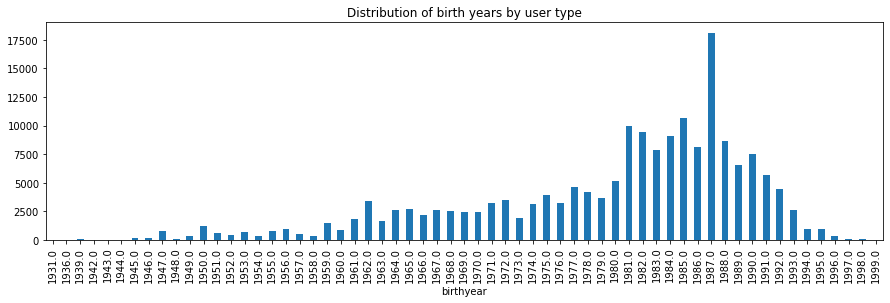

In [11]:
groupby_birthyear_user = data.groupby(['birthyear','usertype'])['birthyear'].count().unstack('usertype').fillna(0)

groupby_birthyear_user['Member'].plot.bar(title = "Distribution of birth years by user type", stacked = True, figsize=(15, 4))

In [12]:
data[data['usertype'] == 'Short-Term Pass Holder']['birthyear'].isnull().values.all()

True

In [13]:
data[data['usertype'] == 'Short_Term Pass Holder']['gender'].isnull().values.all()

True

In [3]:
List_ = list(data['starttime']) #Convert starttime to list
List_

['10/13/2014 10:31',
 '10/13/2014 10:32',
 '10/13/2014 10:33',
 '10/13/2014 10:34',
 '10/13/2014 10:34',
 '10/13/2014 10:34',
 '10/13/2014 11:35',
 '10/13/2014 11:35',
 '10/13/2014 11:35',
 '10/13/2014 11:35',
 '10/13/2014 11:36',
 '10/13/2014 11:37',
 '10/13/2014 11:37',
 '10/13/2014 11:37',
 '10/13/2014 11:37',
 '10/13/2014 11:37',
 '10/13/2014 11:37',
 '10/13/2014 11:37',
 '10/13/2014 11:40',
 '10/13/2014 11:41',
 '10/13/2014 11:41',
 '10/13/2014 11:41',
 '10/13/2014 11:42',
 '10/13/2014 11:43',
 '10/13/2014 11:43',
 '10/13/2014 11:43',
 '10/13/2014 11:43',
 '10/13/2014 11:43',
 '10/13/2014 11:43',
 '10/13/2014 11:44',
 '10/13/2014 11:44',
 '10/13/2014 11:44',
 '10/13/2014 11:45',
 '10/13/2014 11:45',
 '10/13/2014 11:45',
 '10/13/2014 11:45',
 '10/13/2014 11:46',
 '10/13/2014 11:49',
 '10/13/2014 11:49',
 '10/13/2014 11:49',
 '10/13/2014 11:49',
 '10/13/2014 11:49',
 '10/13/2014 11:49',
 '10/13/2014 11:51',
 '10/13/2014 11:51',
 '10/13/2014 11:51',
 '10/13/2014 11:51',
 '10/13/2014 

In [4]:
List_ = [datetime.datetime.strptime(x,"%m/%d/%Y %H:%M") for x in List_] # convert starttime stored in List_ to datetime object

In [5]:
data['starttime_mod'] = pd.Series(List_,index=data.index)
data.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear,starttime_mod
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0,2014-10-13 10:31:00
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0,2014-10-13 10:32:00
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0,2014-10-13 10:33:00
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0,2014-10-13 10:34:00
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0,2014-10-13 10:34:00


In [6]:
data['starttime_date'] = pd.Series([x.date() for x in List_], index=data.index)
data['starttime_year'] = pd.Series([x.year for x in List_], index= data.index)
data['starttime_month'] = pd.Series([x.month for x in List_], index= data.index)
data['starttime_day'] = pd.Series([x.day for x in List_], index= data.index)
data['starttime_hour'] = pd.Series([x.hour for x in List_], index= data.index)

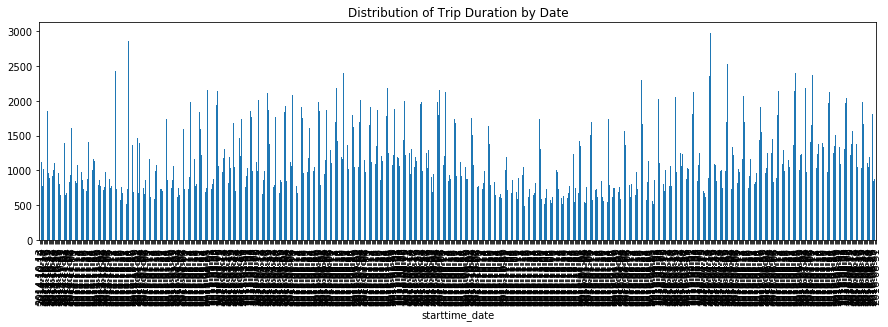

In [18]:
data.groupby('starttime_date')['tripduration'].mean().plot.bar(title = 'Distribution of Trip Duration by Date', figsize=(15,4))

In [19]:
data.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear,starttime_mod,starttime_date,starttime_year,starttime_month,starttime_day,starttime_hour
263686,231080,7/8/2016 16:22,7/8/2016 16:53,SEA00423,1817.524,E Pine St & 16th Ave,E Pine St & 16th Ave,CH-07,CH-07,Member,Female,1931.0,2016-07-08 16:22:00,2016-07-08,2016,7,8,16
13302,16581,11/23/2014 16:46,11/23/2014 16:48,SEA00355,133.610,REI / Yale Ave N & John St,REI / Yale Ave N & John St,SLU-01,SLU-01,Member,Male,1936.0,2014-11-23 16:46:00,2014-11-23,2014,11,23,16
64095,16581,11/23/2014 16:46,11/23/2014 16:48,SEA00355,133.610,REI / Yale Ave N & John St,REI / Yale Ave N & John St,SLU-01,SLU-01,Member,Male,1936.0,2014-11-23 16:46:00,2014-11-23,2014,11,23,16
168216,129895,8/16/2015 17:21,8/16/2015 17:46,SEA00494,1530.681,Terry Ave & Stewart St,Terry Ave & Stewart St,SLU-20,SLU-20,Member,Male,1936.0,2015-08-16 17:21:00,2015-08-16,2015,8,16,17
184490,147070,9/20/2015 16:06,9/20/2015 16:15,SEA00067,547.429,Terry Ave & Stewart St,2nd Ave & Pine St,SLU-20,CBD-13,Member,Male,1936.0,2015-09-20 16:06:00,2015-09-20,2015,9,20,16


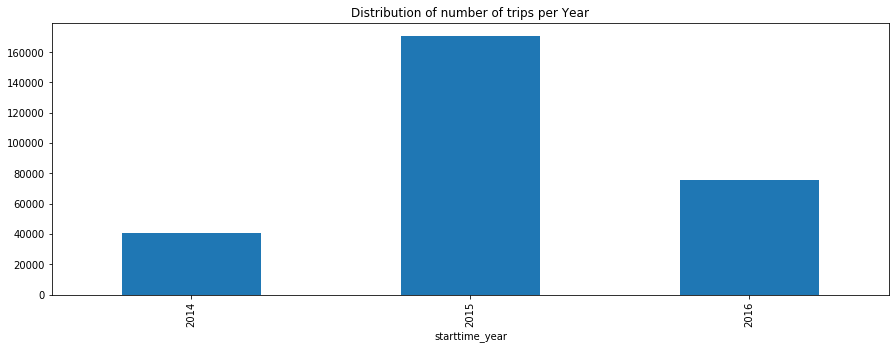

In [20]:
data.groupby('starttime_year')['starttime_year'].count().plot.bar(title = "Distribution of number of trips per Year",figsize=(15,5))

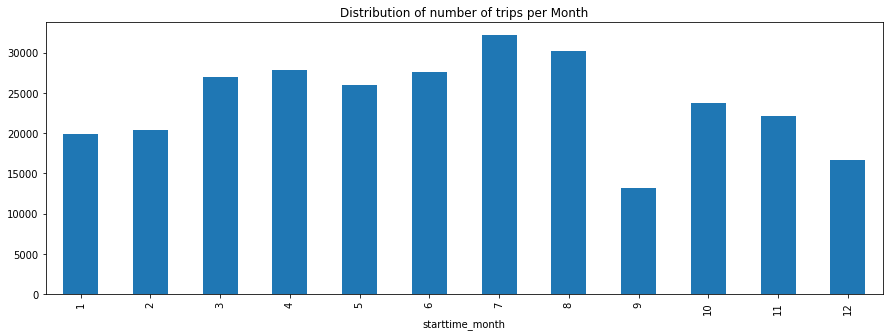

In [21]:
data.groupby('starttime_month')['starttime_month'].count().plot.bar(title="Distribution of number of trips per Month",figsize=(15,5))

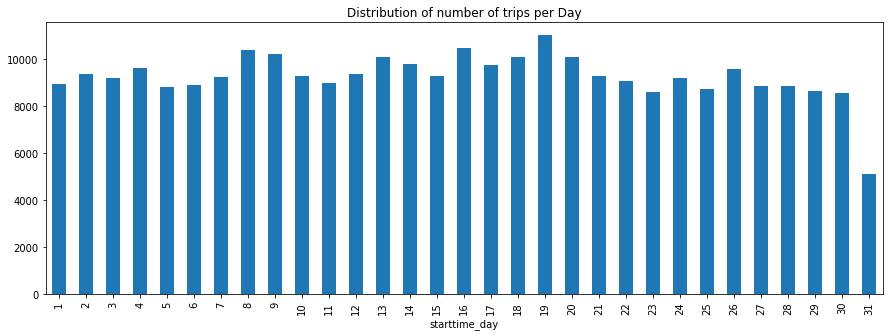

In [22]:
data.groupby('starttime_day')['starttime_day'].count().plot.bar(title="Distribution of number of trips per Day",figsize=(15,5))

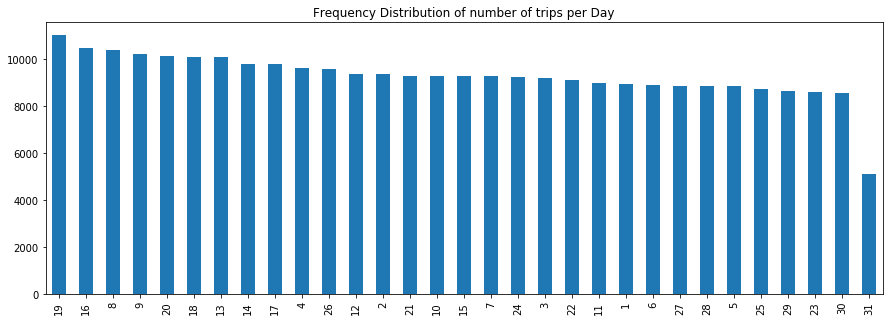

In [23]:
data['starttime_day'].value_counts().plot.bar(title="Frequency Distribution of number of trips per Day",figsize=(15,5))

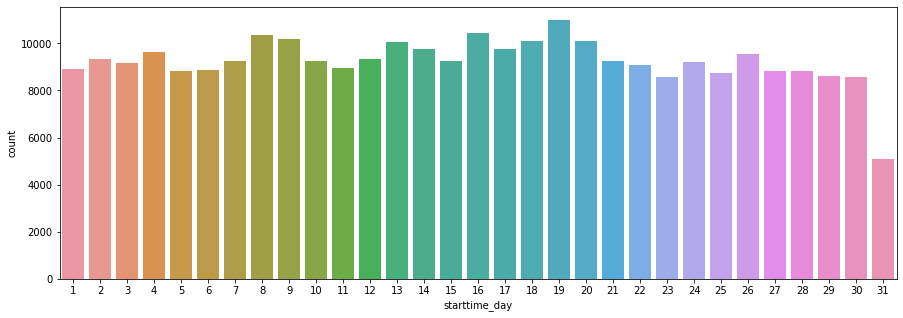

In [24]:
plt.figure(figsize=(15,5))

ax = sns.countplot(x='starttime_day',data=data)
#plt.title="Frequency Distribution of number of trips per Day"

In [34]:
trip_duration

[985.935,
 926.375,
 883.831,
 865.937,
 923.923,
 808.805,
 596.715,
 592.131,
 586.347,
 587.634,
 564.899,
 620.141,
 634.087,
 614.336,
 601.4630000000001,
 618.781,
 617.085,
 600.05,
 499.73400000000004,
 575.307,
 571.807,
 563.763,
 437.689,
 483.154,
 479.38199999999995,
 533.5319999999999,
 481.629,
 460.772,
 459.165,
 680.457,
 920.055,
 936.8739999999999,
 937.166,
 1055.575,
 860.538,
 923.321,
 320.577,
 645.6619999999999,
 650.655,
 625.986,
 623.002,
 622.753,
 1014.444,
 611.484,
 765.908,
 626.845,
 1175.053,
 1174.231,
 766.4110000000001,
 606.6669999999999,
 733.0310000000001,
 787.683,
 752.1469999999999,
 203.94299999999998,
 614.172,
 2676.788,
 2684.59,
 488.523,
 2444.973,
 1213.319,
 2286.013,
 1066.697,
 8737.446,
 353.58,
 535.867,
 531.244,
 666.6189999999999,
 2372.291,
 25119.113999999998,
 332.457,
 872.985,
 415.38800000000003,
 1001.3810000000001,
 986.797,
 979.928,
 353.611,
 132.414,
 888.627,
 690.793,
 351.56300000000005,
 653.071,
 1593.079,
 14

In [7]:
#Note Determining the measures of centers using the statistics package will require us
#to transform the input data structure to a list type.

trip_duration = list(data['tripduration'])
station_from = list(data['from_station_name'])
print('Mean of Trip Duration : %f'%statistics.mean(trip_duration))
print('Median of Trip Duration : %f'%statistics.median(trip_duration))
print('Mode of station originating from : %s'%statistics.mode(station_from))

Mean of Trip Duration : 1178.354284
Median of Trip Duration : 624.846500
Mode of station originating from : Pier 69 / Alaskan Way & Clay St


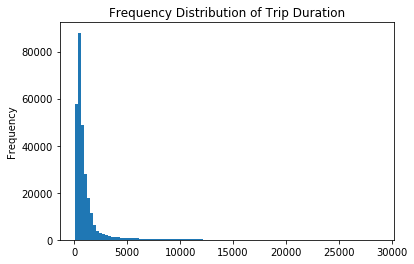

In [26]:
#why the average (i.e., mean) is greater than the central value (i.e., median). On the basis of what she had read, she
#realized that this might be either due to some extreme values after the median or due to 
#the majority of values lying after the median.

data['tripduration'].plot.hist(bins=100, title='Frequency Distribution of Trip Duration')
plt.show()

In [27]:
#The distribution in Figure has only one peak (i.e., mode). The distribution is not symmetric and has majority of values 
#toward the right-hand side of the mode. These extreme values toward the right are negligible in quantity, 
#but their extreme nature tends to pull the mean toward themselves. Thus the reason why the mean is greater than the median.

#The distribution in Figure is referred to as a normal distribution.

In [28]:
#Normal distribution, or in other words Gaussian distribution, is a continuous probability distribution that is bell shaped. 
#The important characteristic of this distribution is that the mean lies at the center of this distribution with a spread 
#(i.e., standard deviation) around it. The majority of the observations in normal distribution lie around the mean
#and fade off as they distance away from the mean.

#A normal distribution with a mean of zero and a standard deviation of 1 is referred to as a standard normal distribution.

#Some 68% of the observations lie within 1 standard deviation from the mean; 95% of the observations lie within 2 standard
#deviations from the mean, whereas 99.7% of the observations lie within 3 standard deviations from the mean.

#See Below Figure.

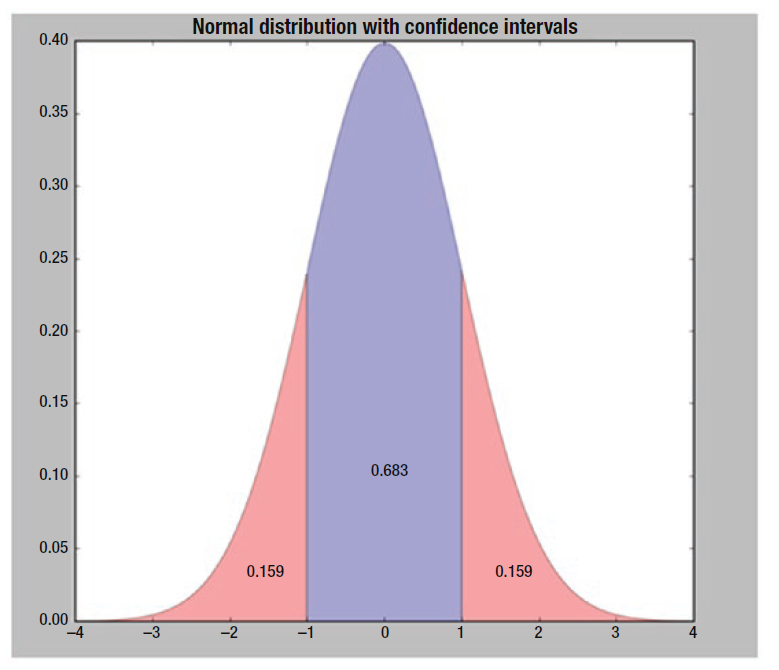

These are the most common confidence levels:
Confidence level Formula
68% Mean ± 1 std.
95% Mean ± 2 std.
99.7% Mean ± 3 std.

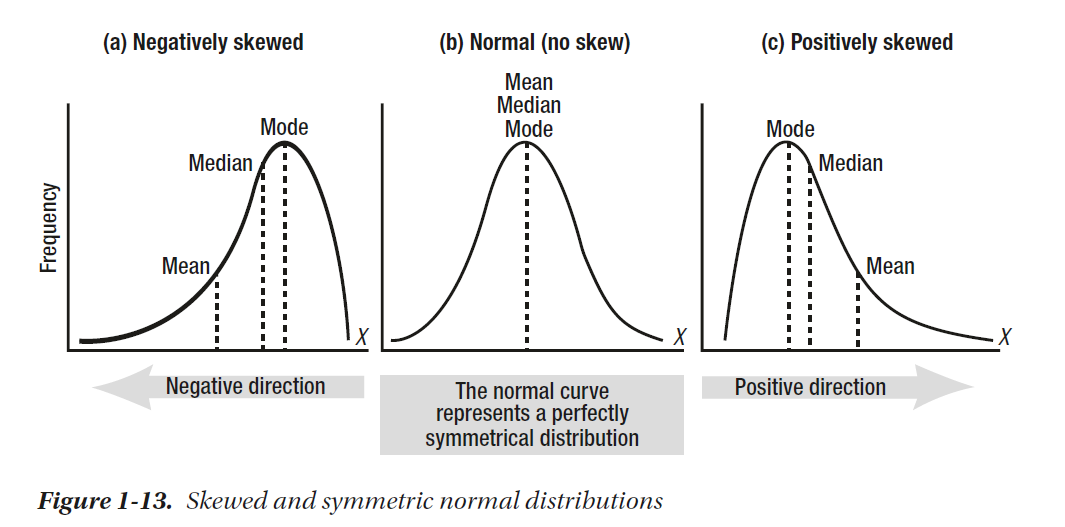

In [29]:
#• Symmetric distributions: Mean = Median = Mode
#• Positively skewed: Mean < Median < Mode
#• Negatively skewed: Mean > Median > Mode

#Outliers refer to the values distinct from majority of the observations. These occur either naturally, due to equipment #failure, or because of entry mistakes.

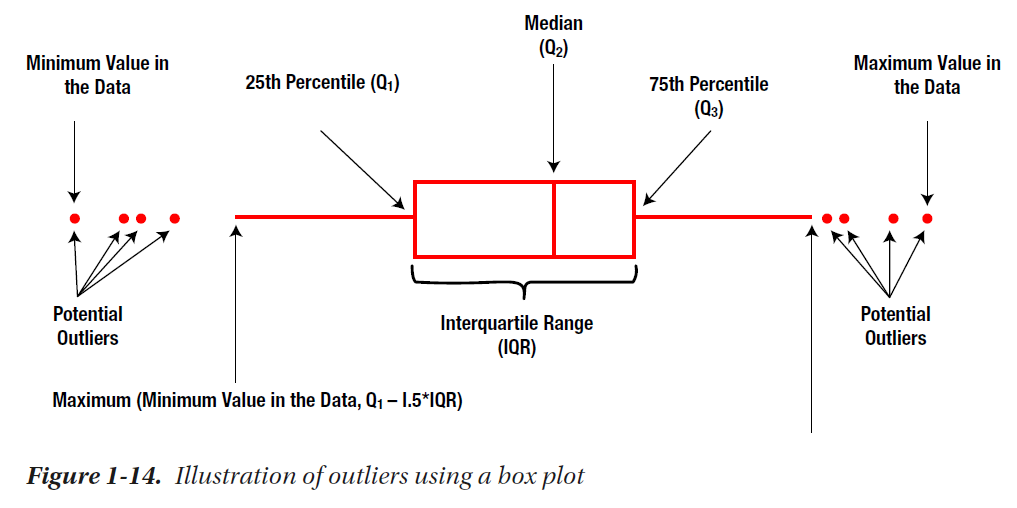

In [30]:
#Interval of Values Not Considered Outliers
#[Q1 – 1.5 (IQR) , Q3 + 1.5 (IQR) ] (i.e. IQR = Q3 - Q1)

#Values not lying within this interval are considered outliers. Knowing the values of Q1 and Q3 is fundamental
#for this calculation to take place.

#• Remove the outliers
#• Replace outliers with means
#• Transform the outlier values : Another way to cop up with outliers is to limit them to the upper and lower boundaries of 
#acceptable data. The upper boundary can be calculated by plugging in the values of Q3 and IQR into Q3 + 1.5IQR and 
#the lower boundary can be calculated by plugging in the values of Q1 and IQR into Q1 – 1.5IQR.
#• Variable transformation:Transformations are used to convert the inherited distribution into a normal distribution.
#natural log, conversion of data into ratio variables, and so on.

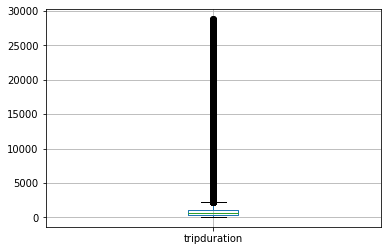

In [31]:
box = data.boxplot(column=['tripduration'])
plt.show()

In [23]:
#huge number of outliers in trip duration from the box plot in Figure

q75, q25 = np.percentile(trip_duration, [75, 25])
iqr = q75 - q25
print('Proportion of Values as Outlier : %f percent'%((len(data) - len([x for x in trip_duration if q75+(1.5*iqr)>=x>= 
                                                                       q25-(1.5*iqr)]))*100/float(len(data))))

Proportion of Values as Outlier : 9.423478 percent


In [33]:
#Formula for Calculating Number of Outliers 
#Number of outliers values = Length of all values - Length of all non outliers values.

#len(data) determines Length of all values and 
#Length of all non outliers values is determined by 
#len([x for x in trip_duration if q75+(1.5*iqr) >=x>=q25-(1.5*iqr)]))

#Formula for Calculating Ratio of Outlier Values
#Ratio of outliers = ( Number of outliers values / Length of all values ) * 100

In [9]:
#Calculating z scores for Observations Lying Within tripduration

mean_trip_duration = np.mean([x for x in trip_duration if q75+(1.5*iqr)>=x>=q25-(1.5*iqr)])
upper_whisker = q75+(1.5*iqr)
print('Mean of Trip Duration : %f'%mean_trip_duration)

Mean of Trip Duration : 700.606146


In [35]:
#The mean of non-outlier trip duration values is considerably lower than that calculated in the presence of outliers.
#This best describes the notion that mean is highly affected by the presence of outliers in the dataset

#“upper_whisker is the maximum value of the right (i.e., positive) whisker i.e. boundary uptill which all values are valid 
#and any value greater than that is considered as an outlier".

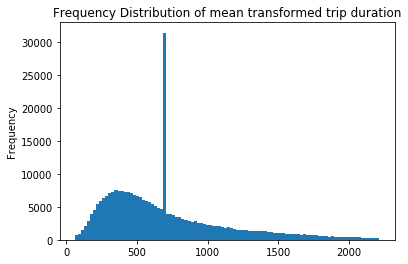

In [10]:
#outliers were transformed into valid value sets.

#Calculating Mean Scores for Observations Lying Within tripduration

def transform_tripduration(x):
    if x > upper_whisker:
        return mean_trip_duration
    return x

data['tripduration_mean'] = data['tripduration'].apply(lambda x: transform_tripduration(x))

data['tripduration_mean'].plot.hist(bins=100, title= 'Frequency Distribution of mean transformed trip duration')
plt.show()

In [37]:
print('Mean of Trip Duration: %f'%data['tripduration_mean'].mean())
print('Standard Deviation of Trip Duration : %f'%data['tripduration_mean'].std())
print('Median of Trip Duration : %f'%data['tripduration_mean'].median())

Mean of Trip Duration: 700.606146
Standard Deviation of Trip Duration : 425.246805
Median of Trip Duration : 624.846500


In [41]:
#male_type = data[data['gender']=='Male']
#male_type.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear,starttime_mod,starttime_date,starttime_year,starttime_month,starttime_day,starttime_hour,tripduration_mean
13302,16581,11/23/2014 16:46,11/23/2014 16:48,SEA00355,133.610,REI / Yale Ave N & John St,REI / Yale Ave N & John St,SLU-01,SLU-01,Member,Male,1936.0,2014-11-23 16:46:00,2014-11-23,2014,11,23,16,133.610
64095,16581,11/23/2014 16:46,11/23/2014 16:48,SEA00355,133.610,REI / Yale Ave N & John St,REI / Yale Ave N & John St,SLU-01,SLU-01,Member,Male,1936.0,2014-11-23 16:46:00,2014-11-23,2014,11,23,16,133.610
168216,129895,8/16/2015 17:21,8/16/2015 17:46,SEA00494,1530.681,Terry Ave & Stewart St,Terry Ave & Stewart St,SLU-20,SLU-20,Member,Male,1936.0,2015-08-16 17:21:00,2015-08-16,2015,8,16,17,1530.681
184490,147070,9/20/2015 16:06,9/20/2015 16:15,SEA00067,547.429,Terry Ave & Stewart St,2nd Ave & Pine St,SLU-20,CBD-13,Member,Male,1936.0,2015-09-20 16:06:00,2015-09-20,2015,9,20,16,547.429
184523,147105,9/20/2015 17:04,9/20/2015 17:12,SEA00460,475.856,2nd Ave & Pine St,Terry Ave & Stewart St,CBD-13,SLU-20,Member,Male,1936.0,2015-09-20 17:04:00,2015-09-20,2015,9,20,17,475.856


In [39]:
#print('Mean of the trip Duration for Male : %f'%male_type.mean())
#print('Median of the trip Duration for Male : %f'%data[data['gender']=='Male'].median())
#print('Mode of the trip Duration for Male : %f'%data[data['gender']== 'Male'].mode())

In [40]:
print("Hello")

Hello


In [43]:
data['tripduration_mean'].head()

263686    1817.524
13302      133.610
64095      133.610
168216    1530.681
184490     547.429
Name: tripduration_mean, dtype: float64

In [11]:
data['male_type'] = data['gender']=='Male'
data['male_type']= data['male_type'].astype(int)
data['male_type'].head()

0    1
1    1
2    0
3    0
4    1
Name: male_type, dtype: int32

In [55]:
data['male_type'].mean()

0.4900124800423903

In [12]:
print('Mean of the trip Duration for Male : %f'%data[data['gender']=='Male']['tripduration'].mean())
print('Median of the trip Duration for Male : %f'%data[data['gender']=='Male']['tripduration'].median())
print('Mode of the trip Duration for Male : %f'%data[data['gender']=='Male']['tripduration'].mode())

Mean of the trip Duration for Male : 564.880833
Median of the trip Duration for Male : 457.516000
Mode of the trip Duration for Male : 466.174000


In [59]:
data[data['gender']=='Male']['tripduration']

13302      133.610
64095      133.610
168216    1530.681
184490     547.429
184523     475.856
            ...   
252000    1203.811
206557     319.395
61628      699.428
131682    4745.422
10835      699.428
Name: tripduration, Length: 140564, dtype: float64

In [62]:
data[data['gender']=='Male']['tripduration'].median()

457.51599999999996

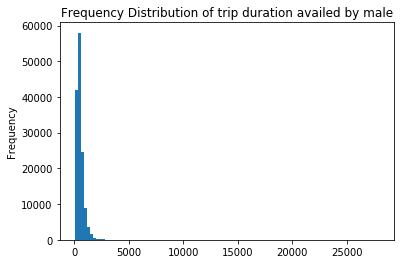

In [14]:
data[data['gender']=='Male']['tripduration'].plot.hist(bins=100, title='Frequency Distribution of trip duration availed by male')
plt.show()

In [49]:
data['male_trip'] = data[data['gender']=='Male']['tripduration']
data['male_trip'].head()

0    985.935
1    926.375
2        NaN
3        NaN
4    923.923
Name: male_trip, dtype: float64

In [44]:
data['male_trip'].mean()

112431.78174567208

In [51]:
data.fillna(data['male_trip'].mean(),inplace=True,axis=1)
#data['male_trip'] = data['male_trip'].fillna((data['male_trip'].mean()))
data['male_trip'].head()

0    985.935000
1    926.375000
2    564.880833
3    564.880833
4    923.923000
Name: male_trip, dtype: float64

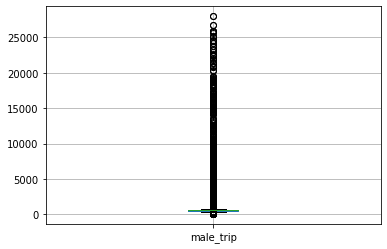

In [52]:
box = data.boxplot(column= ['male_trip'])
plt.show()

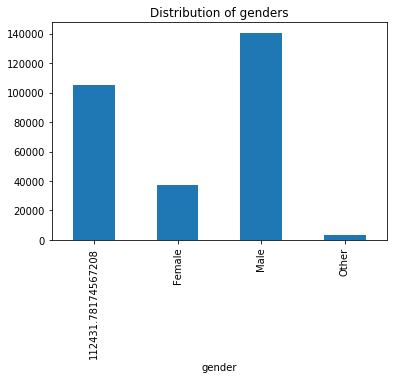

In [53]:
groupby_gender = data.groupby('gender').size()
groupby_gender.plot.bar(title = 'Distribution of genders')

In [54]:
male_trips = list(data['male_trip'])
q75, q25 = np.percentile(male_trips, [75, 25])
print(q75, q25)
iqr = q75 - q25
print('Proportion of Values as Outlier : %f percent'%((len(data) - len([x for x in trip_duration if q75+(1.5*iqr)>=x>= 
                                                                       q25-(1.5*iqr)]))*100/float(len(data))))

564.880833385513 463.85775
Proportion of Values as Outlier : 59.104156 percent


In [55]:
mean_trip_duration = np.mean([x for x in male_trips if q75+(1.5*iqr)>=x>=q25-(1.5*iqr)])
upper_whisker = q75+(1.5*iqr)
print('Mean of Trip Duration : %f'%mean_trip_duration)

Mean of Trip Duration : 537.184134


In [35]:
male_trips

[985.935,
 926.375,
 nan,
 nan,
 923.923,
 808.805,
 596.715,
 592.131,
 nan,
 587.634,
 nan,
 620.141,
 634.087,
 614.336,
 601.4630000000001,
 nan,
 617.085,
 600.05,
 nan,
 575.307,
 571.807,
 563.763,
 437.689,
 nan,
 nan,
 nan,
 481.629,
 460.772,
 nan,
 680.457,
 nan,
 936.8739999999999,
 937.166,
 1055.575,
 nan,
 923.321,
 320.577,
 645.6619999999999,
 nan,
 nan,
 623.002,
 nan,
 1014.444,
 nan,
 765.908,
 626.845,
 1175.053,
 1174.231,
 766.4110000000001,
 606.6669999999999,
 nan,
 nan,
 nan,
 203.94299999999998,
 614.172,
 2676.788,
 nan,
 488.523,
 nan,
 1213.319,
 2286.013,
 1066.697,
 8737.446,
 353.58,
 535.867,
 531.244,
 666.6189999999999,
 2372.291,
 25119.113999999998,
 nan,
 nan,
 415.38800000000003,
 1001.3810000000001,
 nan,
 nan,
 353.611,
 132.414,
 888.627,
 nan,
 nan,
 nan,
 1593.079,
 1490.281,
 213.55900000000003,
 nan,
 nan,
 717.698,
 689.523,
 357.776,
 nan,
 77.656,
 nan,
 nan,
 193.828,
 258.41900000000004,
 nan,
 1254.226,
 nan,
 1189.182,
 nan,
 735.12

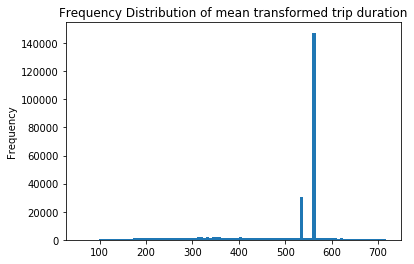

In [56]:
def transform_tripduration(x):
    if x > upper_whisker:
        return mean_trip_duration
    return x

data['male_trip_mean'] = data['male_trip'].apply(lambda x: transform_tripduration(x))

data['male_trip_mean'].plot.hist(bins=100, title= 'Frequency Distribution of mean transformed trip duration')
plt.show()

In [57]:
male_trip_mean = list(data['male_trip_mean'])

q75, q25 = np.percentile(male_trip_mean, [75, 25])
iqr = q75 - q25
print('Proportion of Values as Outlier : %f percent'%((len(data) - len([x for x in trip_duration if q75+(1.5*iqr)>=x>= 
                                                                       q25-(1.5*iqr)]))*100/float(len(data))))

Proportion of Values as Outlier : 59.104156 percent
